<a href="https://colab.research.google.com/github/DamodaraBarbosa/xbox_game_pass_analisys/blob/main/Date_analysis_Xbox_Game_Pas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
sns.set()

Parâmetros para o matplotlib.pyplot

In [48]:
plt.rcParams['figure.figsize'] = (18, 12)
parametros = {'axes.labelsize': 25, 'axes.titlesize': 30}
plt.rcParams.update(parametros)

Importando os dados do Xbox Game Pass

In [12]:
gamepass = pd.read_csv('/content/data_gamepass.csv')

In [13]:
gamepass.head()

,game,system,status,release_date,added,removed,genre,developer,publisher,esrb,...,addons,ta_score,gamerscore,ratio,gamers,comp_%,comp_time,rating,metascore,userscore
0,PERSONA 3 PORTABLE,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,Role-Playing,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,PERSONA 4 GOLDEN,Xbox / PC,Coming Soon,NaN,2023-01-01,NaN,NaN,Atlus,Sega,M,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,HIGH ON LIFE,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,First-Person Shooter,NaN,NaN,M,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,HELLO NEIGHBOR 2,Xbox / PC,Coming Soon,NaN,2022-12-01,NaN,Strategy / Puzzle,Dynamic Pixels,TinyBuild,E10+,...,[''],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,WARHAMMER 40000 DARKTIDE,Xbox / PC,Coming Soon,NaN,2022-11-01,NaN,Action,Fatshark,Fatshark,RP,...,['Optimized for Xbox Series X/S'],NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
gamepass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game          1197 non-null   object 
 1   system        1196 non-null   object 
 2   status        1196 non-null   object 
 3   release_date  753 non-null    object 
 4   added         1197 non-null   object 
 5   removed       646 non-null    object 
 6   genre         1192 non-null   object 
 7   developer     733 non-null    object 
 8   publisher     733 non-null    object 
 9   esrb          678 non-null    object 
 10  esrb content  594 non-null    object 
 11  addons        733 non-null    object 
 12  ta_score      906 non-null    float64
 13  gamerscore    906 non-null    float64
 14  ratio         905 non-null    float64
 15  gamers        926 non-null    float64
 16  comp_%        926 non-null    float64
 17  comp_time     846 non-null    float64
 18  rating        864 non-null  

# Tratamentos para as datas

In [15]:
# os dados das colunas release date, added e removed devem ser convertidos para datetime:

gamepass['release_date'] = pd.to_datetime(gamepass['release_date'])
gamepass['added'] = pd.to_datetime(gamepass['added'])
gamepass['removed'] = pd.to_datetime(gamepass['removed'])

In [16]:
gamepass.dtypes

game                    object
system                  object
status                  object
release_date    datetime64[ns]
added           datetime64[ns]
removed         datetime64[ns]
genre                   object
developer               object
publisher               object
esrb                    object
esrb content            object
addons                  object
ta_score               float64
gamerscore             float64
ratio                  float64
gamers                 float64
comp_%                 float64
comp_time              float64
rating                 float64
metascore              float64
userscore              float64
dtype: object

In [17]:
# devido a natureza da análise, que é basicamente em relação as datas dos jogos, trata-se o dataframe para que apenas
# as colunas relacionadas a datas sejam parte da base de dados:

gamepass = gamepass[['game', 'release_date', 'added', 'removed']]
gamepass.head()

,game,release_date,added,removed
0,PERSONA 3 PORTABLE,NaT,2023-01-01,NaT
1,PERSONA 4 GOLDEN,NaT,2023-01-01,NaT
2,HIGH ON LIFE,NaT,2022-12-01,NaT
3,HELLO NEIGHBOR 2,NaT,2022-12-01,NaT
4,WARHAMMER 40000 DARKTIDE,NaT,2022-11-01,NaT


## Definindo novas colunas derivadas dos dados da base

In [32]:
# coluna com o tempo em dias que os jogos levaram para serem adicionados ao Game Pass após o seu lançamento:

gamepass['insert_time'] = (gamepass['added'] - gamepass['release_date']).dt.days

In [33]:
# coluna com o tempo em dias para que os jogos fossem removidos do serviço:

gamepass['remove_time'] = (gamepass['removed'] - gamepass['added']).dt.days

In [36]:
# coluna com o mês em que os jogos foram inseridos no Game Pass:

gamepass['insert_month'] = gamepass['added'].dt.month

In [38]:
# coluna com o mês em que os jogos foram removidos do Game Pass:

gamepass['remove_month'] = gamepass['removed'].dt.month

In [41]:
 # coluna com o ano em que os jogos foram inseridos no Game Pass:

gamepass['insert_year'] = gamepass['added'].dt.year

In [42]:
# coluna com o ano em que os jogos foram removidos do Game Pass:

gamepass['remove_year'] = gamepass['removed'].dt.year

In [43]:
# visualizando o dataframe:

gamepass

,game,release_date,added,removed,insert_time,remove_time,insert_month,remove_month,insert_year,remove_year
0,PERSONA 3 PORTABLE,NaT,2023-01-01,NaT,NaN,NaN,1,NaN,2023,NaN
1,PERSONA 4 GOLDEN,NaT,2023-01-01,NaT,NaN,NaN,1,NaN,2023,NaN
2,HIGH ON LIFE,NaT,2022-12-01,NaT,NaN,NaN,12,NaN,2022,NaN
3,HELLO NEIGHBOR 2,NaT,2022-12-01,NaT,NaN,NaN,12,NaN,2022,NaN
4,WARHAMMER 40000 DARKTIDE,NaT,2022-11-01,NaT,NaN,NaN,11,NaN,2022,NaN
...,...,...,...,...,...,...,...,...,...,...
1192,STRIDER,2014-02-19,2017-06-01,2018-03-01,1198.0,273.0,6,3.0,2017,2018.0
1193,VIRTUA FIGHTER 5 FINAL SHOWDOWN,2012-06-06,2017-06-01,2018-03-01,1821.0,273.0,6,3.0,2017,2018.0
1194,WWE 2K16,2015-10-27,2017-06-01,2018-01-01,583.0,214.0,6,1.0,2017,2018.0
1195,NBA 2K16,2015-09-25,2017-06-01,2017-12-01,615.0,183.0,6,12.0,2017,2017.0


# Análises 

## Anos

In [54]:
# quantidade de jogos adicionados por ano:

games_insert_per_year = gamepass['insert_year'].value_counts()
games_insert_per_year

2021    266
2020    264
2019    205
2022    181
2017    163
2018    116
2023      2
Name: insert_year, dtype: int64

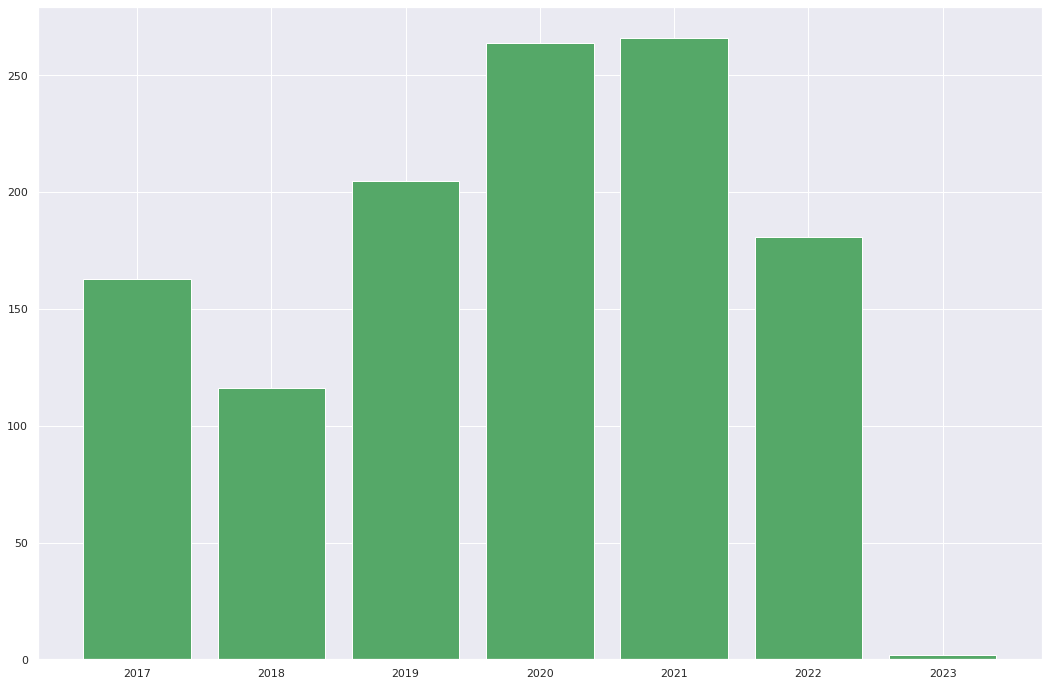

In [68]:
plt.bar(games_insert_per_year.keys(), games_insert_per_year.values, color= 'g')
plt.show()

In [59]:
# média, mediana para os jogos inseridos por ano:

pd.DataFrame({'Média': games_insert_per_year.mean(),
              'Mediana': games_insert_per_year.median()},
             index= [0])

,Média,Mediana
0,171.0,181.0


In [62]:
pd.DataFrame({'Desvio padrão': games_insert_per_year.std()}, index= [0])

,Desvio padrão
0,91.815031


In [69]:
# quantidade de jogos removidos por ano:

games_removed_per_year = gamepass['remove_year'].value_counts()
games_removed_per_year

2021.0    179
2022.0    137
2020.0    134
2019.0    115
2018.0     79
2017.0      2
Name: remove_year, dtype: int64

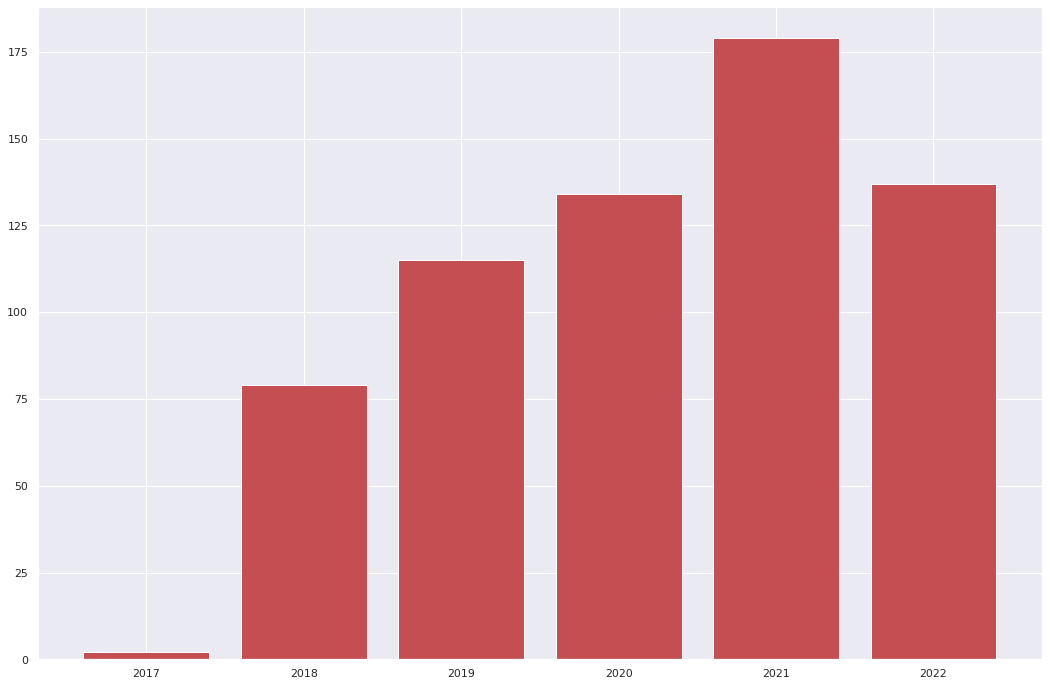

In [71]:
plt.bar(games_removed_per_year.keys(), games_removed_per_year.values, color= 'r')
plt.show()